In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
# %matplotlib inline
import csv

In [2]:
df_house = pd.read_csv('cleaned_data.csv')
df_house

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,total_sqft,total_sqft15
0,7129300520,221900,3,1.00,1180,5650,1.0,0,0,3,...,98178,47.5112,-122.257,1340,5650,2014,10,13,6830,6990
1,6414100192,538000,3,2.25,2570,7242,2.0,0,0,3,...,98125,47.7210,-122.319,1690,7639,2014,12,9,9812,9329
2,5631500400,180000,2,1.00,770,10000,1.0,0,0,3,...,98028,47.7379,-122.233,2720,8062,2015,2,25,10770,10782
3,2487200875,604000,4,3.00,1960,5000,1.0,0,0,5,...,98136,47.5208,-122.393,1360,5000,2014,12,9,6960,6360
4,1954400510,510000,3,2.00,1680,8080,1.0,0,0,3,...,98074,47.6168,-122.045,1800,7503,2015,2,18,9760,9303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21262,263000018,360000,3,2.50,1530,1131,3.0,0,0,3,...,98103,47.6993,-122.346,1530,1509,2014,5,21,2661,3039
21263,6600060120,400000,4,2.50,2310,5813,2.0,0,0,3,...,98146,47.5107,-122.362,1830,7200,2015,2,23,8123,9030
21264,1523300141,402101,2,0.75,1020,1350,2.0,0,0,3,...,98144,47.5944,-122.299,1020,2007,2014,6,23,2370,3027
21265,291310100,400000,3,2.50,1600,2388,2.0,0,0,3,...,98027,47.5345,-122.069,1410,1287,2015,1,16,3988,2697


In [3]:
# Display basic statistics of the numerical columns
statistics = df_house.describe()
print(statistics)

# Count of unique values in each column
unique_counts = df_house.nunique()
print(unique_counts)

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.126700e+04  2.126700e+04  21267.000000  21267.000000  21267.000000   
mean   4.619509e+09  5.378501e+05      3.370198      2.108407   2066.803263   
std    2.875051e+09  3.668515e+05      0.930189      0.765313    902.340689   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.143701e+09  3.200000e+05      3.000000      1.500000   1420.000000   
50%    3.972901e+09  4.500000e+05      3.000000      2.250000   1900.000000   
75%    7.340601e+09  6.400000e+05      4.000000      2.500000   2530.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  12050.000000   

            sqft_lot        floors   waterfront          view     condition  \
count   21267.000000  21267.000000  21267.00000  21267.000000  21267.000000   
mean    10927.186110      1.492806      0.00757      0.229840      3.411906   
std     13777.386877      0.540576      0.08668    

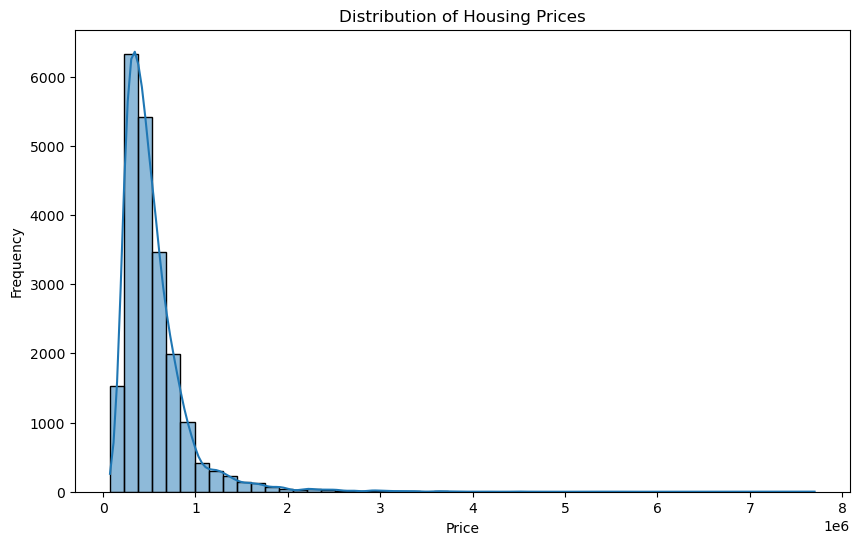

In [4]:
# Plot a histogram of distribution of housing prices
plt.figure(figsize=(10, 6))
sns.histplot(df_house['price'], bins=50, kde=True)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

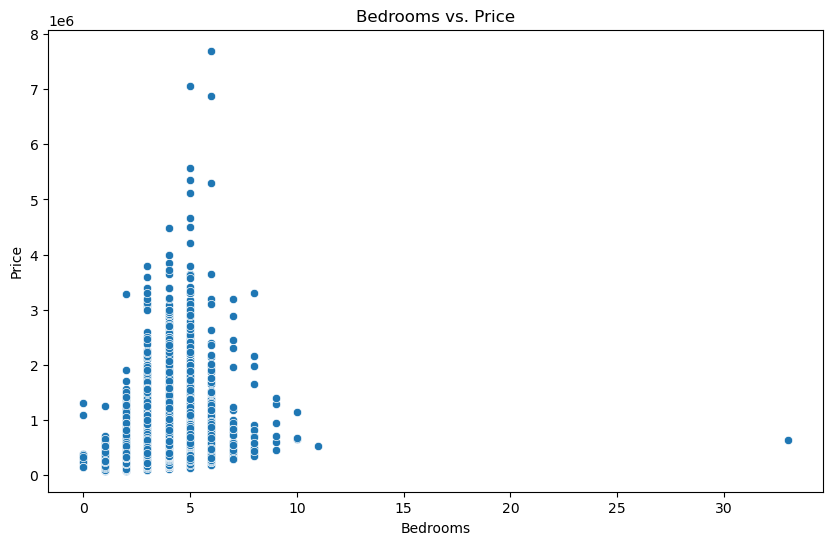

In [5]:
# Scatter plot of bedrooms vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='price', data=df_house)
plt.title('Bedrooms vs. Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

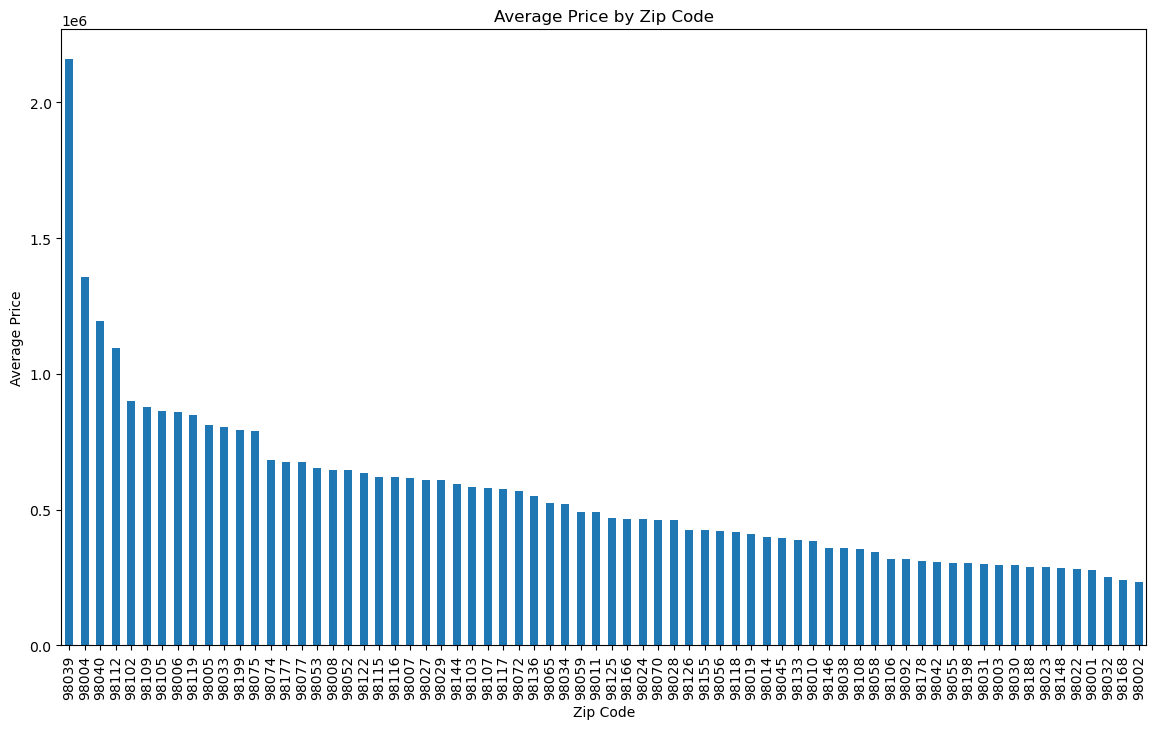

In [6]:
# Group by zip code and calculate average price
average_price_by_zip = df_house.groupby('zipcode')['price'].mean().sort_values(ascending=False)

# Bar plot of average price by zip code
plt.figure(figsize=(14, 8))
average_price_by_zip.plot(kind='bar')
plt.title('Average Price by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Average Price')
plt.show()

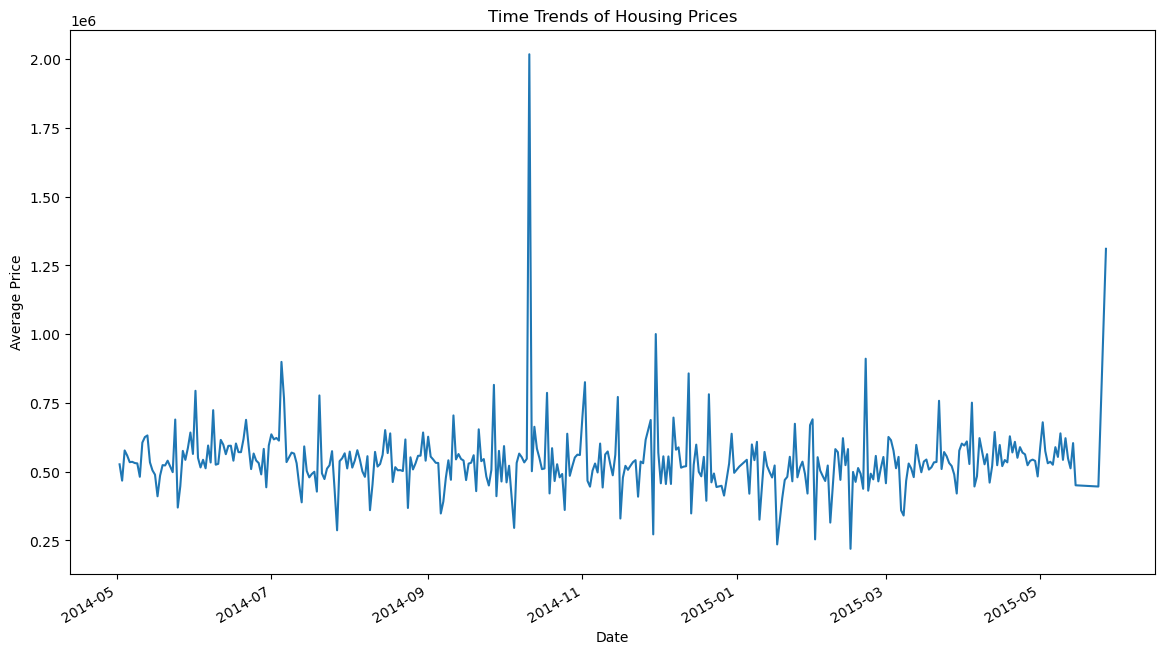

In [7]:
# Create a new column with the combined date
df_house['date'] = pd.to_datetime(df_house[['year', 'month', 'day']].astype(str).agg('-'.join, axis=1))

# Line plot of time trends
plt.figure(figsize=(14, 8))
time_trends = df_house.groupby('date')['price'].mean()
time_trends.plot()
plt.title('Time Trends of Housing Prices')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

### Linear Regression

In [8]:
# 'X' contains your feature columns and 'y' is the target variable
X = df_house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']]
y = df_house['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = linear_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 168947.93475063407


### Decision Tree Regression

Mean Absolute Error (Decision Tree): 204019.89265005483
Mean Squared Error (Decision Tree): 102483691738.28288
R-squared (Decision Tree): 0.25134985044412506


Text(0, 0.5, 'Predicted Prices')

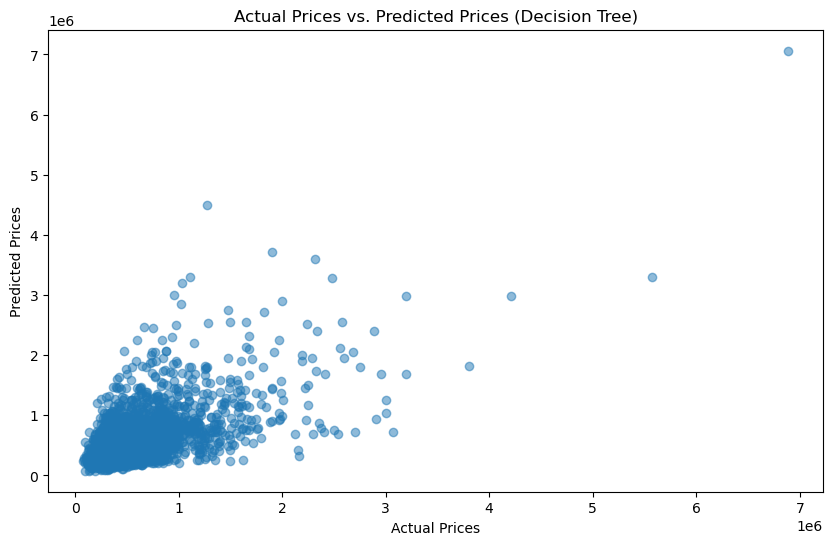

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Features
X = df_house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']]
# Target variable
y = df_house['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree regression model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
tree_predictions = tree_model.predict(X_test)

# Evaluate the model
mae_tree = mean_absolute_error(y_test, tree_predictions)
mse_tree = mean_squared_error(y_test, tree_predictions)
r2_tree = r2_score(y_test, tree_predictions)

print(f'Mean Absolute Error (Decision Tree): {mae_tree}')
print(f'Mean Squared Error (Decision Tree): {mse_tree}')
print(f'R-squared (Decision Tree): {r2_tree}')

# Visualizing Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, tree_predictions, alpha=0.5)
plt.title('Actual Prices vs. Predicted Prices (Decision Tree)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

Mean Absolute Error (MAE): The average absolute difference between the actual and predicted prices is around 204,020.

Mean Squared Error (MSE): The average squared difference between the actual and predicted prices is around 102,483,691,738.

R-squared (R2): The R-squared value is approximately 0.25, indicating that the model explains about 25% of the variance in the target variable.

#### Hyperparameter Tuning

In [19]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_tree_model = grid_search.best_estimator_
best_tree_predictions = best_tree_model.predict(X_test)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


This output tells that, according to the specified grid, the best-performing Decision Tree model had a max_depth of 10, min_samples_leaf of 2, and min_samples_split of 10. These values are considered optimal for your dataset based on the negative mean absolute error as the scoring metric. The last part of the code uses these best hyperparameters to create the best_tree_model and make predictions on the test set (X_test). This is useful because it ensures that we are using the most optimized version of the model when evaluating its performance on unseen data.

#### Feature Importance

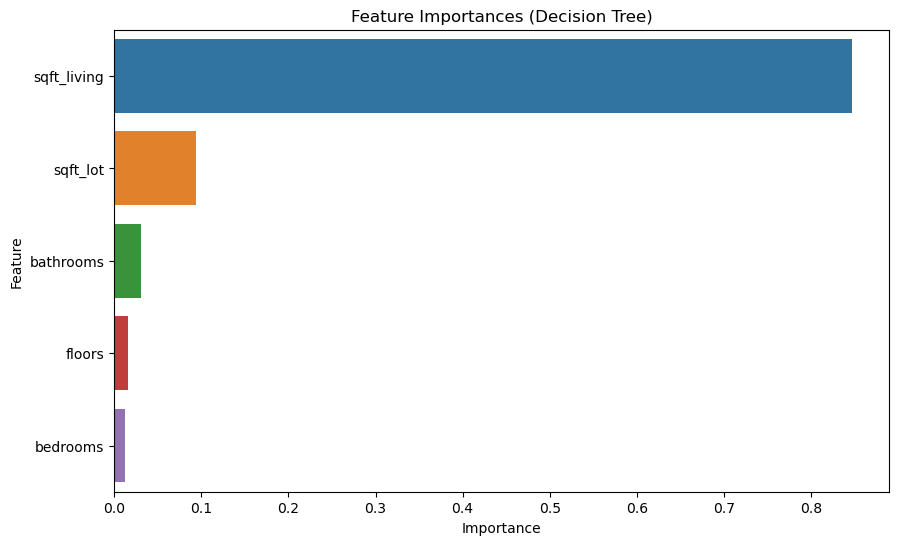

In [20]:
# Access feature importances from the trained model
feature_importances = best_tree_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances (Decision Tree)')
plt.show()

The sqft_living has the highest importance, it means that, according to the Decision Tree model, the sqft_living feature contributes the most to making predictions about the target variable (housing prices). In the context of predicting housing prices, this could mean that the living area square footage (sqft_living) has a significant impact on determining the price of a house according to the patterns learned by the Decision Tree. Larger living areas may be associated with higher prices, and the model has identified this feature as crucial for making accurate predictions.

### Random Forest Regression

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the random forest regression model
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)

# Make predictions on the test set
forest_predictions = forest_model.predict(X_test)

# Evaluate the model
mae_forest = mean_absolute_error(y_test, forest_predictions)
print(f'Mean Absolute Error (Random Forest): {mae_forest}')

Mean Absolute Error (Random Forest): 153418.23651840285


### XGBoost Regression

In [12]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [13]:
from xgboost import XGBRegressor

# Create and train the XGBoost regression model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, xgb_predictions)
print(f'Mean Absolute Error (XGBoost): {mae_xgb}')

Mean Absolute Error (XGBoost): 152114.17991889987


### Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)

In [14]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 66112417028.57458
Root Mean Squared Error: 257123.34983150515
